In [2]:
#importing libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('train_bm.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Before we train the model, we have to tell the model about the the dependent and independent features. SO, seperate out features and target variables

In [4]:
features = data.drop(["Item_Identifier", "Item_Outlet_Sales"], axis=1)
target = data.Item_Outlet_Sales

In [5]:
from sklearn.neighbors import KNeighborsRegressor

In [6]:
# KNeighborsRegressor is a class. Therefore, we need to create an instance of this class to use it.
knn = KNeighborsRegressor()

In [7]:
# now we can use knn for accessing functions of KNeighborsRegressor

knn.fit(features, target)

ValueError: could not convert string to float: 'Low Fat'

Issue with Knn is:
- Can't be used on String Features
- Can't be used on features with missing data

## Preparing data for Sklearn

1. Impute missing data (by mean, mode etc)
2. Remove categorical data (eg: 1 hot encoding)

### 1. Missing Data

In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
data.Item_Weight.head(10)

#lets impute the missing values here by mean.

0     9.300
1     5.920
2    17.500
3    19.200
4     8.930
5    10.395
6    13.650
7       NaN
8    16.200
9    19.200
Name: Item_Weight, dtype: float64

In [13]:
item_wight_mean = data.Item_Weight.mean()
item_wight_mean

12.857645184135976

In [16]:
data['Item_Weight'] = data['Item_Weight'].fillna(value=item_wight_mean)
data.Item_Weight.head(10)


0     9.300000
1     5.920000
2    17.500000
3    19.200000
4     8.930000
5    10.395000
6    13.650000
7    12.857645
8    16.200000
9    19.200000
Name: Item_Weight, dtype: float64

In [17]:
#lets look at Outlet_Size
data['Outlet_Size'].head()

0    Medium
1    Medium
2    Medium
3       NaN
4      High
Name: Outlet_Size, dtype: object

In [25]:
#as Outlet_Size is a categorical feature, lets replace missing values via mode

outlet_size_mode = data.Outlet_Size.mode()[0]
outlet_size_mode

'Medium'

In [26]:
data['Outlet_Size'] = data['Outlet_Size'].fillna(value=outlet_size_mode)
data['Outlet_Size'].head()

0    Medium
1    Medium
2    Medium
3    Medium
4      High
Name: Outlet_Size, dtype: object

In [27]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### 2. Categorical Data

In [28]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [29]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [31]:
pd.get_dummies(data['Outlet_Type']).head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [33]:
#converting categorical columns to one-hot encoding

data = pd.get_dummies(data.drop(['Item_Identifier'], axis=1))
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


This is the basics of how to to clean datasets.
Lets now look at implementation of KNN for both regression and classificaltion problems. Lets use a clean data for Titanic problems.

## kNN Classification

In [34]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [36]:
data_titanic = pd.read_csv('data_cleaned.csv')
data_titanic.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


a. segregate the variables into depended and independent variables


In [42]:
X = data_titanic.drop(['Survived'], axis=1)
y = data_titanic['Survived']

X.shape, y.shape

((891, 24), (891,))

b. Scaling the data to ensure a better prediction by kNN as kNN expects scaled data

In [44]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
x_scales = scalar.fit_transform(X)

x_scales

array([[0.27117366, 0.01415106, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.4722292 , 0.13913574, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.32143755, 0.01546857, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.36792055, 0.04577135, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.32143755, 0.0585561 , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.39683338, 0.01512699, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [48]:
# as the output of x_scales is an array, we need to convert it to a dataframe in order to work further on it
X = pd.DataFrame(x_scales, columns=X.columns)

X.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


c. Dividing the data into test and train

In [51]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=56, stratify=y)
# stratify ensures that there are equal proportion of classes in both test and train dataset

## Implemeting kNN Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.metrics import f1_score

In [53]:
clf = kNN(n_neighbors=5)

#fit the model
clf.fit(train_X, train_y)

#now the model has been created in clf. Use this to predict test_X
test_predict = clf.predict(test_X)

#now test_predict has list of prediction of test_X. test_y has the actual target values. To understand the accuracy, we need to compare test_predct and test_X
k = f1_score(test_predict, test_y)
k

0.6785714285714285

Till now, we took the default value of k = 5. Lets do elbow test to identify correct value for k

## Elbow Test

In [54]:
def Elbow(k):
    test_error = []
    
    for i in k:
        clf = kNN(n_neighbors= i )
        clf.fit(train_X, train_y)

        predict = clf.predict(test_X)
        score = f1_score(predict, test_y)
        error = 1-score
        test_error.append(error)
    
    return test_error



In [70]:
k = range(6,20, 2)

In [71]:
elbow_list = Elbow(k)
elbow_list

[0.33333333333333326,
 0.2993630573248408,
 0.30434782608695654,
 0.2962962962962963,
 0.2962962962962963,
 0.29999999999999993,
 0.3125]

Text(0.5, 1.0, 'Elbow Curve')

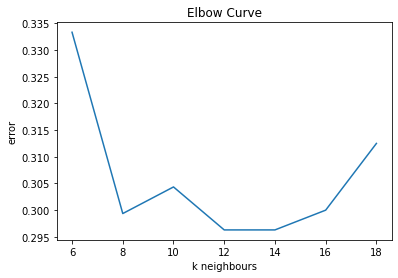

In [72]:
#now, we have the points (k) and the value of the points (elbow_list). Lets create a plot

plt.plot(k, elbow_list)
plt.xlabel("k neighbours")
plt.ylabel("error")
plt.title("Elbow Curve")

In [79]:
clf = kNN(n_neighbors=12)

#fit the model
clf.fit(train_X, train_y)

#now the model has been created in clf. Use this to predict test_X
test_predict = clf.predict(test_X)

#now test_predict has list of prediction of test_X. test_y has the actual target values. To understand the accuracy, we need to compare test_predct and test_X
k = f1_score(test_predict, test_y)
k

0.7037037037037037

The accuracy has increased. This is how we do kNN Classification

## Implemeting kNN Regressor

In [80]:
#using 'data' which has bigMart cleaned data

data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


a. segregate the variables into depended and independent variables


In [85]:
X = data.drop(['Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']

X.shape, y.shape

((8523, 45), (8523,))

b. Scaling the data (Using MinMax Scaler)

In [86]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

In [88]:
X = pd.DataFrame(x_scaled)

In [89]:
# Importing Train test split
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y, random_state = 56)

### Implementing KNN Regressor

In [90]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [94]:
reg = KNN(n_neighbors= 5)

reg.fit(train_X, train_y)

test_predict = reg.predict(test_X)
err  = mse(test_predict, test_y)
err

1713950.5693649529

### Elbow for Regression

In [95]:
def reg_Elbow(k):
    reg_test = []

    for i in k:
        reg_model = KNN(n_neighbors=i)
        reg_model.fit(train_X, train_y)

        model_predict = reg_model.predict(test_X)

        err = mse(model_predict, test_y)
        reg_test.append(err)
    return reg_test

In [104]:
k = range(1, 30)
k

range(1, 30)

In [105]:
error_values = reg_Elbow(k)
error_values

[2668963.08619692,
 2068648.035601036,
 1838422.7472560566,
 1756215.7879024628,
 1713950.5693649529,
 1667927.8739516104,
 1637545.6244221819,
 1631724.7622075113,
 1645409.6244073529,
 1650726.3168473616,
 1671765.2321116608,
 1679510.9222819256,
 1698516.602555003,
 1706132.3420314589,
 1723952.3877612252,
 1733825.417654485,
 1759259.557258881,
 1774930.6599678218,
 1788198.8493109106,
 1806980.3159277432,
 1821101.66970522,
 1837951.026694835,
 1855954.8554868244,
 1864028.935298429,
 1878620.1801888533,
 1894107.5424646265,
 1904426.0692804095,
 1906564.0367275917,
 1914216.2934171788]

Text(0, 0.5, 'Error')

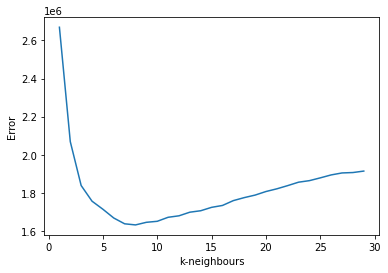

In [106]:
#plot
plt.plot(k, error_values)
plt.xlabel("k-neighbours")
plt.ylabel("Error")

In [112]:
reg = KNN(n_neighbors= 8)

reg.fit(train_X, train_y)

test_predict = reg.predict(test_X)
err  = mse(test_predict, test_y)
err

1631724.7622075113

The error is decreased when we used 8 neighbours as compared to 5 neighbours